In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# Load the JSON data into a DataFrame
data = pd.read_json('data-sample.json')

Flatten the json to csv using json-roller

In [3]:
data = pd.read_csv('data-sample_normalized.csv')

In [4]:
# Display the first few rows of the DataFrame
print(data.head())

   taskLocationDone.lon  taskLocationDone.lat            taskCreatedTime  \
0            109.762910             -6.926608  2022-11-01 20:17:26 +0700   
1            110.033986             -7.876154  2022-11-01 08:41:07 +0700   
2            109.999733             -7.849777  2022-11-01 08:41:07 +0700   
3            110.003708             -7.710998  2022-11-01 08:41:07 +0700   
4            110.013887             -7.829742  2022-11-01 08:41:07 +0700   

   cod.amount cod.received  taskAssignedTo          taskCompletedTime  \
0    685000.0         True   pacifiedLion0  2022-11-01 20:46:30 +0700   
1     53500.0         True  peacefulTacos6  2022-11-01 12:33:48 +0700   
2    179500.0         True  peacefulTacos6  2022-11-01 13:41:57 +0700   
3     31815.0         True  peacefulTacos6  2022-11-01 18:18:19 +0700   
4    144562.0         True  peacefulTacos6  2022-11-01 10:51:49 +0700   

  taskStatus      flow                taskId UserVar.branch_dest  \
0       done  Delivery  4fe3b237c832

In [5]:
# Get a summary of the DataFrame, including data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskLocationDone.lon           7566 non-null   float64
 1   taskLocationDone.lat           7566 non-null   float64
 2   taskCreatedTime                8334 non-null   object 
 3   cod.amount                     2358 non-null   float64
 4   cod.received                   2358 non-null   object 
 5   taskAssignedTo                 8333 non-null   object 
 6   taskCompletedTime              7566 non-null   object 
 7   taskStatus                     8334 non-null   object 
 8   flow                           8334 non-null   object 
 9   taskId                         8334 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

In [6]:
# Check the dimensions of the DataFrame
print(data.shape)

(8334, 18)


In [7]:
# Check the number of missing values in each column
print(data.isnull().sum())

taskLocationDone.lon              768
taskLocationDone.lat              768
taskCreatedTime                     0
cod.amount                       5976
cod.received                     5976
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64


In [8]:
data.head()

,taskLocationDone.lon,taskLocationDone.lat,taskCreatedTime,cod.amount,cod.received,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,109.762910,-6.926608,2022-11-01 20:17:26 +0700,685000.0,True,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,110.033986,-7.876154,2022-11-01 08:41:07 +0700,53500.0,True,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,109.999733,-7.849777,2022-11-01 08:41:07 +0700,179500.0,True,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,110.003708,-7.710998,2022-11-01 08:41:07 +0700,31815.0,True,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,110.013887,-7.829742,2022-11-01 08:41:07 +0700,144562.0,True,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01


In [9]:
#Renaming columns to a much more convenient name.
data = data.rename(columns={"taskLocationDone.lon":"long","taskLocationDone.lat":"lat", "taskCreatedTime":"task_created_time", "cod.amount":"cod_amount", "cod.received":"cod_received", "taskAssignedTo":"worker", "taskCompletedTime":"task_completed_time", "taskStatus":"status", "taskId":"id", "UserVar.branch_dest":"branch_destination", "UserVar.taskStatusLabel":"status_label", "UserVar.receiver_city":"receiver_city", "UserVar.taskDetailStatusLabel":"detail_status_label","UserVar.taskDetailStatus":"detail_status","UserVar.weight":"weight", "UserVar.branch_origin":"branch_origin", "UserVar.taskStatus":"status_code"})

In [10]:
data.head()

,long,lat,task_created_time,cod_amount,cod_received,worker,task_completed_time,status,flow,id,branch_destination,status_label,receiver_city,detail_status_label,detail_status,weight,branch_origin,status_code
0,109.762910,-6.926608,2022-11-01 20:17:26 +0700,685000.0,True,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,110.033986,-7.876154,2022-11-01 08:41:07 +0700,53500.0,True,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,109.999733,-7.849777,2022-11-01 08:41:07 +0700,179500.0,True,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,110.003708,-7.710998,2022-11-01 08:41:07 +0700,31815.0,True,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,110.013887,-7.829742,2022-11-01 08:41:07 +0700,144562.0,True,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01


In [11]:
# #There is no need to use this, because completion_time will be blank if task_completed_time is already a blank.
# data = data.dropna(subset=['task_completed_time'])

In [12]:
# Check the number of missing values in each column
print(data.isnull().sum())

long                    768
lat                     768
task_created_time         0
cod_amount             5976
cod_received           5976
worker                    1
task_completed_time     768
status                    0
flow                      0
id                        0
branch_destination        0
status_label            762
receiver_city            52
detail_status_label     762
detail_status           762
weight                    0
branch_origin           293
status_code             762
dtype: int64


In [13]:
data['task_created_time'] = data['task_created_time'].str[:19]
data['task_completed_time'] = data['task_completed_time'].str[:19]

data['task_created_time'] = pd.to_datetime(data['task_created_time'])
data['task_completed_time'] = pd.to_datetime(data['task_completed_time'])



In [14]:
data['completion_time'] = np.ceil((data['task_completed_time'] - data['task_created_time']) / pd.Timedelta(minutes=1))

In [15]:
data.head()

,long,lat,task_created_time,cod_amount,cod_received,worker,task_completed_time,status,flow,id,branch_destination,status_label,receiver_city,detail_status_label,detail_status,weight,branch_origin,status_code,completion_time
0,109.762910,-6.926608,2022-11-01 20:17:26,685000.0,True,pacifiedLion0,2022-11-01 20:46:30,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01,30.0
1,110.033986,-7.876154,2022-11-01 08:41:07,53500.0,True,peacefulTacos6,2022-11-01 12:33:48,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01,233.0
2,109.999733,-7.849777,2022-11-01 08:41:07,179500.0,True,peacefulTacos6,2022-11-01 13:41:57,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,301.0
3,110.003708,-7.710998,2022-11-01 08:41:07,31815.0,True,peacefulTacos6,2022-11-01 18:18:19,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,578.0
4,110.013887,-7.829742,2022-11-01 08:41:07,144562.0,True,peacefulTacos6,2022-11-01 10:51:49,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,131.0


UNTUK EDA kategori waktu pagi siang malam

In [16]:
# #Adding day column
# data['task_created_date'] = data['task_created_time'].str[:10]
# data['task_completed_date'] = data['task_completed_time'].str[:10]

# #Removing day from both the date_rptd and date_occ column
# data['task_created_time'] = data['task_created_time'].str[11:19]
# data['task_completed_time'] = data['task_completed_time'].str[11:19]

# #Converting both the date_rptd and date_occ column to their appropriate data type
# data['task_created_date'] = pd.to_datetime(data['task_created_date'])
# data['task_completed_date'] = pd.to_datetime(data['task_completed_date'])
# data['task_created_time'] = pd.to_datetime(data['task_created_time'], format='%H:%M:%S').dt.time
# data['task_completed_time'] = pd.to_datetime(data['task_completed_time'], format='%H:%M:%S').dt.time

C:\Users\rizki\AppData\Local\Temp\ipykernel_1100\2079052625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['completion_time'],color="y", bins = 400)


<Axes: xlabel='completion_time', ylabel='Density'>

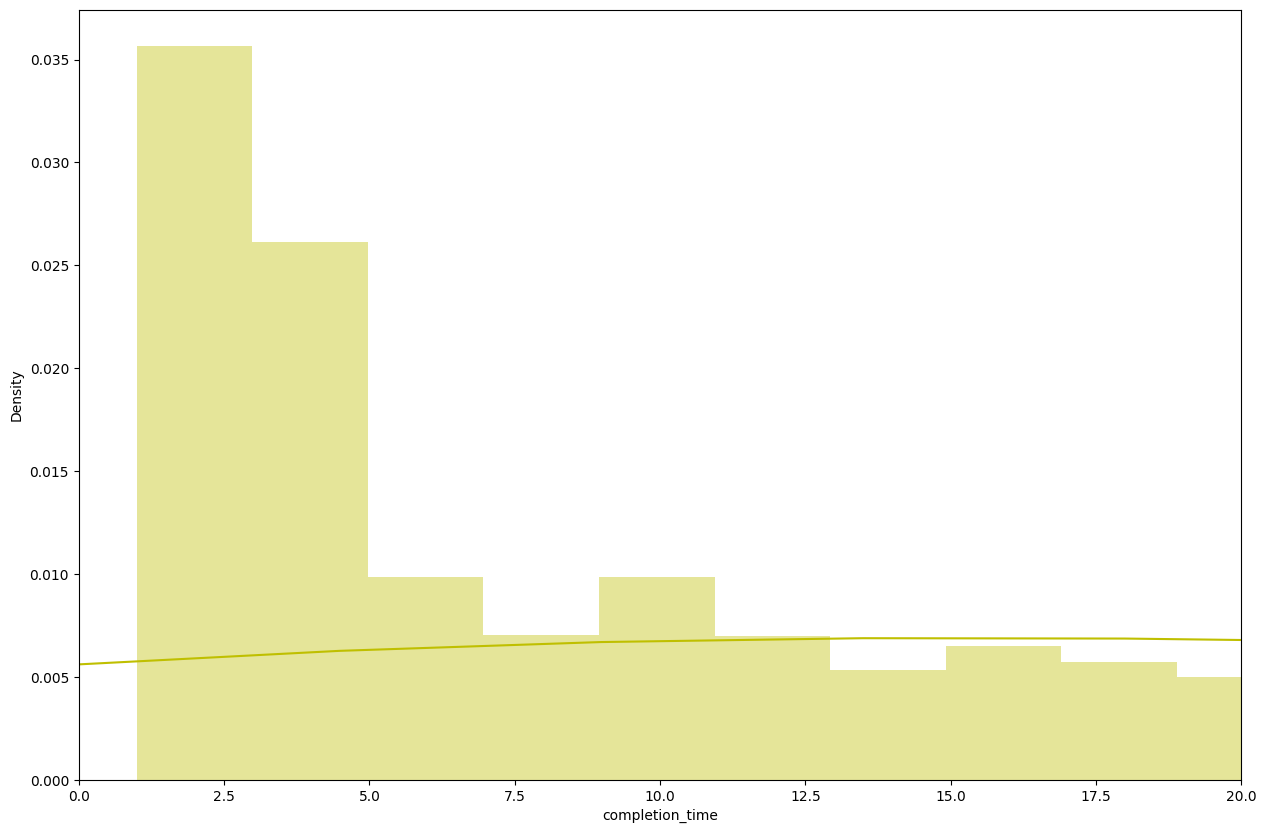

In [17]:
plt.figure(figsize=(15,10))
plt.xlim(0,20)
sns.distplot(data['completion_time'],color="y", bins = 400)

Machine Learning

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   long                 7566 non-null   float64       
 1   lat                  7566 non-null   float64       
 2   task_created_time    8334 non-null   datetime64[ns]
 3   cod_amount           2358 non-null   float64       
 4   cod_received         2358 non-null   object        
 5   worker               8333 non-null   object        
 6   task_completed_time  7566 non-null   datetime64[ns]
 7   status               8334 non-null   object        
 8   flow                 8334 non-null   object        
 9   id                   8334 non-null   object        
 10  branch_destination   8334 non-null   object        
 11  status_label         7572 non-null   object        
 12  receiver_city        8282 non-null   object        
 13  detail_status_label  7572 non-nul

In [19]:
data = data.dropna(subset=['task_completed_time'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7566 entries, 0 to 8333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   long                 7566 non-null   float64       
 1   lat                  7566 non-null   float64       
 2   task_created_time    7566 non-null   datetime64[ns]
 3   cod_amount           1974 non-null   float64       
 4   cod_received         1974 non-null   object        
 5   worker               7566 non-null   object        
 6   task_completed_time  7566 non-null   datetime64[ns]
 7   status               7566 non-null   object        
 8   flow                 7566 non-null   object        
 9   id                   7566 non-null   object        
 10  branch_destination   7566 non-null   object        
 11  status_label         7566 non-null   object        
 12  receiver_city        7520 non-null   object        
 13  detail_status_label  7566 non-nul

In [21]:
data = data.drop(['detail_status', 'status_code', 'flow', 'status'], axis = 1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7566 entries, 0 to 8333
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   long                 7566 non-null   float64       
 1   lat                  7566 non-null   float64       
 2   task_created_time    7566 non-null   datetime64[ns]
 3   cod_amount           1974 non-null   float64       
 4   cod_received         1974 non-null   object        
 5   worker               7566 non-null   object        
 6   task_completed_time  7566 non-null   datetime64[ns]
 7   id                   7566 non-null   object        
 8   branch_destination   7566 non-null   object        
 9   status_label         7566 non-null   object        
 10  receiver_city        7520 non-null   object        
 11  detail_status_label  7566 non-null   object        
 12  weight               7566 non-null   float64       
 13  branch_origin        7287 non-nul

In [23]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['cod_received']=lab.fit_transform(data['cod_received'])
data['worker']=lab.fit_transform(data['worker'])
data['id']=lab.fit_transform(data['id'])
data['branch_destination']=lab.fit_transform(data['branch_destination'])
data['status_label']=lab.fit_transform(data['status_label'])
data['receiver_city']=lab.fit_transform(data['receiver_city'])
data['detail_status_label']=lab.fit_transform(data['detail_status_label'])
data['branch_origin']=lab.fit_transform(data['branch_origin'])

In [24]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['cod_received']=lab.fit_transform(data['cod_received'])
value_counts = data['cod_received'].value_counts()
print(value_counts)

2    5592
0    1279
1     695
Name: cod_received, dtype: int64


In [25]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

C:\Users\rizki\AppData\Local\Temp\ipykernel_1100\1050877806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,long,lat,cod_amount,cod_received,worker,id,branch_destination,status_label,receiver_city,detail_status_label,weight,branch_origin,completion_time
long,1.000000,-0.689458,-0.020300,-0.077385,-0.019116,0.025857,-0.023447,0.101697,-0.045705,0.079229,-0.022402,-0.004799,0.200760
lat,-0.689458,1.000000,0.105776,0.016721,-0.008703,-0.011282,0.123594,-0.141486,0.131135,-0.085610,0.018110,0.032143,-0.161137
cod_amount,-0.020300,0.105776,1.000000,-0.106349,0.001416,0.026434,0.016414,-0.108466,0.063753,-0.110471,0.444998,-0.007610,-0.051705
cod_received,-0.077385,0.016721,-0.106349,1.000000,-0.026234,0.000634,-0.075845,0.594356,-0.057228,0.179958,0.126110,0.164558,-0.040259
worker,-0.019116,-0.008703,0.001416,-0.026234,1.000000,0.004287,-0.037054,0.005996,-0.017090,0.014884,-0.032649,0.013099,0.038008
id,0.025857,-0.011282,0.026434,0.000634,0.004287,1.000000,-0.004381,0.013259,-0.003542,0.013383,-0.014216,-0.008440,0.002541
branch_destination,-0.023447,0.123594,0.016414,-0.075845,-0.037054,-0.004381,1.000000,-0.165466,0.235163,-0.037247,0.009055,0.075807,-0.107088
status_label,0.101697,-0.141486,-0.108466,0.594356,0.005996,0.013259,-0.165466,1.000000,-0.125041,0.411182,0.099634,0.078970,0.306615
receiver_city,-0.045705,0.131135,0.063753,-0.057228,-0.017090,-0.003542,0.235163,-0.125041,1.000000,-0.080757,-0.007208,0.029945,-0.016612
detail_status_label,0.079229,-0.085610,-0.110471,0.179958,0.014884,0.013383,-0.037247,0.411182,-0.080757,1.000000,0.040938,-0.001713,0.180583


In [26]:
# Calculate correlation matrix
corr = data.corr()

# Select the specific column you want to sort by
column_name = 'status_label'

# Get the correlation values for the selected column
column_corr = corr[column_name]

# Sort the correlation values in descending order
sorted_corr = column_corr.sort_values(ascending=False)

# Reorder the rows of the correlation matrix based on the sorted correlation values
sorted_corr_matrix = corr.loc[sorted_corr.index, sorted_corr.index]

# Display the sorted correlation matrix
sorted_corr_matrix.style.background_gradient(cmap='inferno')

C:\Users\rizki\AppData\Local\Temp\ipykernel_1100\3791917428.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,status_label,cod_received,detail_status_label,completion_time,long,weight,branch_origin,id,worker,cod_amount,receiver_city,lat,branch_destination
status_label,1.000000,0.594356,0.411182,0.306615,0.101697,0.099634,0.078970,0.013259,0.005996,-0.108466,-0.125041,-0.141486,-0.165466
cod_received,0.594356,1.000000,0.179958,-0.040259,-0.077385,0.126110,0.164558,0.000634,-0.026234,-0.106349,-0.057228,0.016721,-0.075845
detail_status_label,0.411182,0.179958,1.000000,0.180583,0.079229,0.040938,-0.001713,0.013383,0.014884,-0.110471,-0.080757,-0.085610,-0.037247
completion_time,0.306615,-0.040259,0.180583,1.000000,0.200760,-0.050253,-0.035021,0.002541,0.038008,-0.051705,-0.016612,-0.161137,-0.107088
long,0.101697,-0.077385,0.079229,0.200760,1.000000,-0.022402,-0.004799,0.025857,-0.019116,-0.020300,-0.045705,-0.689458,-0.023447
weight,0.099634,0.126110,0.040938,-0.050253,-0.022402,1.000000,-0.014242,-0.014216,-0.032649,0.444998,-0.007208,0.018110,0.009055
branch_origin,0.078970,0.164558,-0.001713,-0.035021,-0.004799,-0.014242,1.000000,-0.008440,0.013099,-0.007610,0.029945,0.032143,0.075807
id,0.013259,0.000634,0.013383,0.002541,0.025857,-0.014216,-0.008440,1.000000,0.004287,0.026434,-0.003542,-0.011282,-0.004381
worker,0.005996,-0.026234,0.014884,0.038008,-0.019116,-0.032649,0.013099,0.004287,1.000000,0.001416,-0.017090,-0.008703,-0.037054
cod_amount,-0.108466,-0.106349,-0.110471,-0.051705,-0.020300,0.444998,-0.007610,0.026434,0.001416,1.000000,0.063753,0.105776,0.016414


https://www.kaggle.com/code/pranavanand24/applied-machine-learning-feature-eng-major-algo

In [27]:
x_features = ['cod_received', 'detail_status_label', 'completion_time']

In [28]:
x = data[x_features]
y = data['status_label']

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7566 entries, 0 to 8333
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_received         7566 non-null   int64  
 1   detail_status_label  7566 non-null   int32  
 2   completion_time      7566 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 206.9 KB


In [30]:
# Finding the best parameter
#  from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# param_grid = [{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'epsilon':[1, 10, 100]}]
# optimal_params = GridSearchCV(
#     SVC(C = 0.1),
#     param_grid,
#     cv = 2,
#     scoring='r2',
#     verbose = 1
# )

# optimal_params.fit(x_train,y_train)
# print(optimal_params.best_params_)

In [33]:
# Define the bins and labels for grouping
bins = [0, 120, 900]  # Define your desired integer ranges
labels = ['within 2 hours', 'more than 2 hours']  # Define the corresponding labels for each range

# Group the integer values into categories using cut
data['completion_time_group'] = pd.cut(data['completion_time'], bins=bins, labels=labels, right=False)

data['completion_time_group'] = data['completion_time_group'].astype('object')

In [48]:
data['completion_time_group']=lab.fit_transform(data['completion_time_group'])

In [49]:
x_features = ['branch_destination', 'detail_status_label', 'status_label']

In [50]:
x = data[x_features]
y = data['completion_time_group']

In [52]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: completion_time_group, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
x.head()

0       within 2 hours
1    more than 2 hours
2    more than 2 hours
3    more than 2 hours
4    more than 2 hours
Name: completion_time_group, dtype: object

# Support Vector Classification

In [54]:
from sklearn.svm import SVC
classifier = SVC(C=0.1, kernel='linear')

classifier.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv=4)
print(scores)

In [55]:
train_pred = classifier.predict(x_train)
train_true = y_train
train_residuals = train_true - train_pred

test_pred = classifier.predict(x_test)
test_true = y_test
test_residuals = test_true - test_pred

# Random Forest

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [135]:
#Finding the best parameter

param_grid = [{'n_estimators': [1,5,10,25,50,100], 'criterion':['gini', 'entropy', 'log_loss']}]
optimal_params = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv = 4,
    scoring='accuracy',
    verbose = 1
)

optimal_params.fit(x_train,y_train)
print(optimal_params.best_params_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
{'criterion': 'entropy', 'n_estimators': 50}


Karena n_estimatornya berubah-ubah tiap iterasi runtime, maka parameter n_estimator perlu diplot agar trennya terlihat.

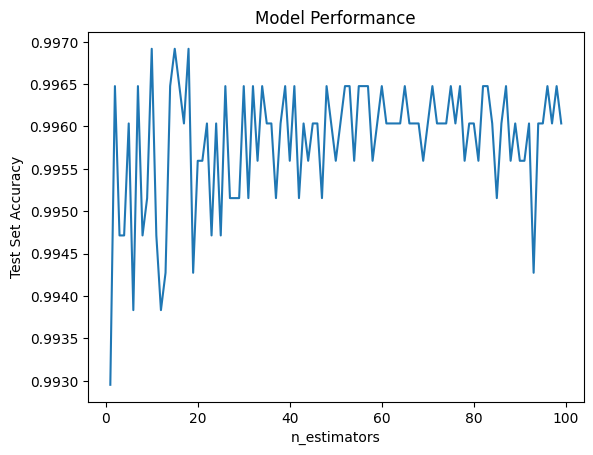

In [139]:
scores =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

sns.lineplot(x=range(1, 100), y=scores)
plt.xlabel('n_estimators')
plt.ylabel('Test Set Accuracy')
plt.title('Model Performance')
plt.show()

Sepertinya angka n_estimator tidak terlalu penting untuk dataset ini, kita bisa gunakan value defaultnya saja, yaitu 100.

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [58]:
train_pred = rf_classifier.predict(x_train)
train_true = y_train
train_residuals = train_true - train_pred

test_pred = rf_classifier.predict(x_test)
test_true = y_test
test_residuals = test_true - test_pred

# Metrics

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Accuracy
accuracy_train = accuracy_score(train_true,train_pred)
accuracy_test = accuracy_score(test_true,test_pred)

# Precision
precision_train = precision_score(train_true, train_pred)
precision_test = precision_score(test_true, test_pred)

# Recall
recall_train = recall_score(train_true, train_pred)
recall_test = recall_score(test_true, test_pred)

# F1 Score
f1_train = f1_score(train_true, train_pred)
f1_test = f1_score(test_true, test_pred)

# Confusion Matrix
cm_train = confusion_matrix(train_true, train_pred)
cm_test = confusion_matrix(test_true, test_pred)

# Print the results
print("Accuracy (Train/Test):", format(accuracy_train, ".3f"), "/", format(accuracy_test, ".3f"))
print("Precision (Train/Test):", format(precision_train, ".3f"), "/", format(precision_test, ".3f"))
print("Recall (Train/Test):", format(recall_train, ".3f"), "/", format(recall_test, ".3f"))
print("F1 Score (Train/Test):", format(f1_train, ".3f"), "/", format(f1_test, ".3f"))
print("Confusion Matrix (Train):\n", cm_train)
print("Confusion Matrix (Test):\n", cm_test)


Accuracy (Train/Test): 0.829 / 0.803
Precision (Train/Test): 0.835 / 0.819
Recall (Train/Test): 0.969 / 0.953
F1 Score (Train/Test): 0.897 / 0.881
Confusion Matrix (Train):
 [[ 467  778]
 [ 125 3926]]
Confusion Matrix (Test):
 [[ 171  365]
 [  82 1652]]


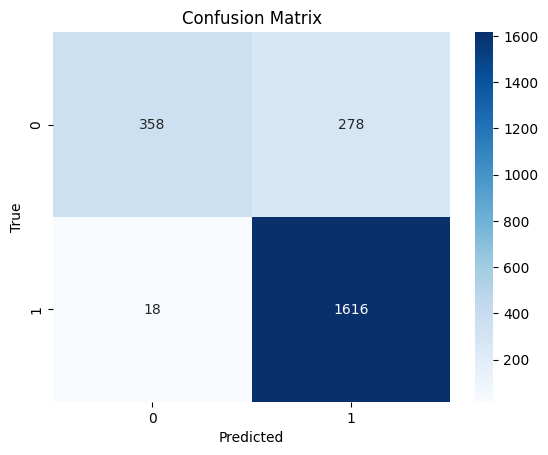

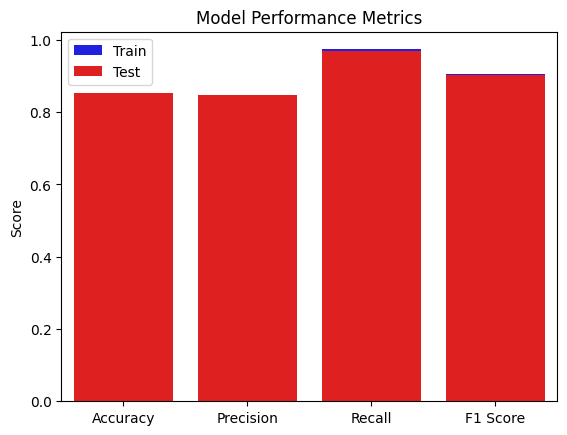

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(test_true, test_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Assuming you have calculated the accuracy, precision, recall, and F1 score
accuracy_train = 0.854
accuracy_test = 0.853
precision_train = 0.846
precision_test = 0.848
recall_train = 0.974
recall_test = 0.969
f1_train = 0.905
f1_test = 0.904

# Creating a bar plot for accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [accuracy_train, precision_train, recall_train, f1_train]
test_scores = [accuracy_test, precision_test, recall_test, f1_test]

sns.barplot(x=metrics, y=train_scores, color='blue', label='Train')
sns.barplot(x=metrics, y=test_scores, color='red', label='Test')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

In [75]:
data.head()

,long,lat,task_created_time,cod_amount,cod_received,worker,task_completed_time,id,branch_destination,status_label,receiver_city,detail_status_label,weight,branch_origin,completion_time
0,109.762910,-6.926608,2022-11-01 20:17:26,685000.0,1,1843,2022-11-01 20:46:30,2403,50,1,137,30,13.000,12,30.0
1,110.033986,-7.876154,2022-11-01 08:41:07,53500.0,1,1895,2022-11-01 12:33:48,288,31,1,1266,30,1.300,12,233.0
2,109.999733,-7.849777,2022-11-01 08:41:07,179500.0,1,1895,2022-11-01 13:41:57,1442,31,1,1266,30,3.000,12,301.0
3,110.003708,-7.710998,2022-11-01 08:41:07,31815.0,1,1895,2022-11-01 18:18:19,1534,31,1,1266,30,0.625,12,578.0
4,110.013887,-7.829742,2022-11-01 08:41:07,144562.0,1,1895,2022-11-01 10:51:49,5036,31,1,66,30,3.000,12,131.0


In [78]:
import pandas as pd
from scipy.stats import ttest_ind

failed_delivery = data[data['status_label'] == 0]['completion_time']
successful_delivery = data[data['status_label'] == 1]['completion_time']

t_statistic, p_value = ttest_ind(failed_delivery, successful_delivery)

alpha = 0.05  # Significance level

print(p_value)

if p_value < alpha:
    print("There is a significant association between completion time and delivery status.")
else:
    print("There is no significant association between completion time and delivery status.")


2.0489749970448333e-164
There is a significant association between completion time and delivery status.


In [88]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame called 'data' with columns 'status_label' and 'cod_received'

# Creating a contingency table


filtered_data = data[data['cod_received'].isin([0, 1])]

contingency_table = pd.crosstab(data['status_label'], filtered_data['cod_received'])

# Performing chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square test results:")
print(f"  Chi-square statistic: {chi2}")
print(f"  P-value: {p_value}")

Contingency Table:
cod_received     0    1
status_label           
0             1235    0
1               44  695

Chi-square test results:
  Chi-square statistic: 1788.4819039118356
  P-value: 0.0


In [108]:
table = pd.DataFrame()
table['Pengukuran'] = test_true.tolist()
table['Prediksi'] = test_pred.tolist()
print(table)

      Pengukuran  Prediksi
0              0         1
1              1         1
2              1         1
3              0         1
4              1         1
...          ...       ...
1509           1         1
1510           0         0
1511           1         0
1512           1         1
1513           1         1

[1514 rows x 2 columns]


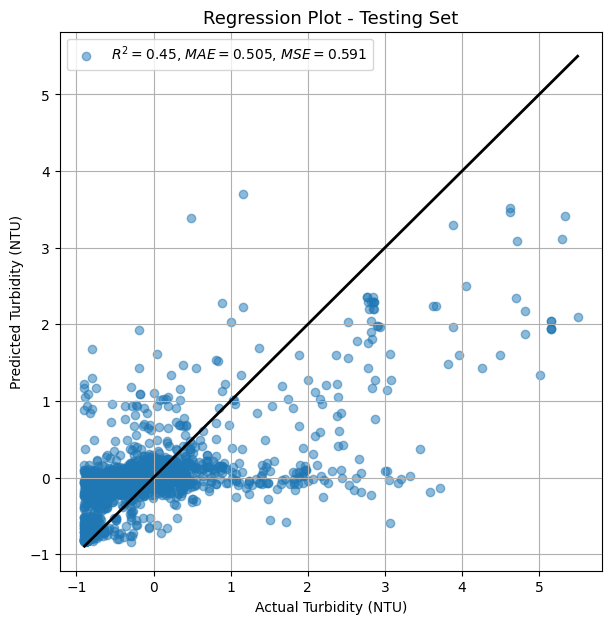

In [451]:
fig, ax = plt.subplots(1,figsize=(7,7))

ax.scatter(y_test, y_pred, label = f'$R^2=${round(r2,3)}, $MAE=${round(mae,3)}, $MSE=${round(mse,3)}', color='tab:blue', alpha=0.5)
theta2 = np.polyfit(y_test, y_pred, 1)
y_line2 = theta2[1] + theta2[0] * y_test
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
ax.set_xlabel('Actual Turbidity (NTU)', fontsize=10)
ax.set_ylabel('Predicted Turbidity (NTU)', fontsize=10)
ax.set_title(f'Regression Plot - Testing Set', fontsize=13)
ax.grid()
ax.legend()

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7566 entries, 0 to 8333
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   long                 7566 non-null   float64       
 1   lat                  7566 non-null   float64       
 2   task_created_time    7566 non-null   datetime64[ns]
 3   cod_amount           1974 non-null   float64       
 4   cod_received         7566 non-null   int32         
 5   worker               7566 non-null   int32         
 6   task_completed_time  7566 non-null   datetime64[ns]
 7   status               7566 non-null   int32         
 8   id                   7566 non-null   int32         
 9   branch_destination   7566 non-null   int32         
 10  status_label         7566 non-null   int32         
 11  receiver_city        7566 non-null   int32         
 12  detail_status_label  7566 non-null   int32         
 13  weight               7566 non-nul

In [ ]:
plt.figure(figsize = (14, 12))
sns.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")